# 行列演算の基礎

$\boldsymbol{w} = (\boldsymbol{X}^{T}\boldsymbol{X})^{-1}\boldsymbol{X}^{T}\boldsymbol{y}$

- ベクトルの定義
- 行例の定義
- 転置
- 逆行列
- 行列積

In [10]:
import numpy as np

In [11]:
# ベクトルの定義
x = np.array([[1], [2], [3]])
print(x)

[[1]
 [2]
 [3]]


In [12]:
# 行列の定義
X = np.array([[1, 2], [3, 4]])
print(X)

[[1 2]
 [3 4]]


In [13]:
# 転置
Xt = X.T
print(Xt)

[[1 3]
 [2 4]]


In [14]:
# 逆行列
# linear algebra: 線形代数
X_inv = np.linalg.inv(X)
print(X_inv)

[[-2.   1. ]
 [ 1.5 -0.5]]


In [15]:
# 行列積
XX_inv = np.dot(X, X_inv)
print(XX_inv)

[[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


# よくある間違い

In [16]:
x = np.array([1, 2, 3])

In [17]:
x.T

array([1, 2, 3])

In [18]:
x = np.array([[1, 2, 3]])
x.T

array([[1],
       [2],
       [3]])

# Numpyでよく使う処理

In [19]:
X = np.array([
    [2, 3, 4],
    [1, 2, 3]
])

In [20]:
row, col = X.shape

In [21]:
print(row, col)

2 3


In [22]:
for x in X:
    print(x)
    print('--')

[2 3 4]
--
[1 2 3]
--


# 演習問題

$\boldsymbol{X} = \begin{bmatrix}
1 & 2 & 3 \\
1 & 2 & 5 \\
1 & 2 & 4 \\
1 & 5 & 9 \\
\end{bmatrix}
,\ \boldsymbol{y} = \begin{bmatrix}
1 \\
5 \\
6 \\
8 \\
\end{bmatrix}
$のとき

$\boldsymbol{w} = (\boldsymbol{X}^{T}\boldsymbol{X})^{-1}\boldsymbol{X}^{T}\boldsymbol{y}$

In [23]:
# Xの定義
X = np.array([
    [1, 2, 3],
    [1, 2, 5],
    [1, 3, 4],
    [1, 5, 9]
])
print(X)

[[1 2 3]
 [1 2 5]
 [1 3 4]
 [1 5 9]]


In [24]:
y = np.array([
    [1],
    [5],
    [6],
    [8]
])
print(y)

[[1]
 [5]
 [6]
 [8]]


In [25]:
# Step 1
XtX = np.dot(X.T, X)
print(XtX)

[[  4  12  21]
 [ 12  42  73]
 [ 21  73 131]]


In [26]:
# Step 2
XtX_inv = np.linalg.inv(XtX)
print(XtX_inv)

[[ 1.76530612 -0.39795918 -0.06122449]
 [-0.39795918  0.84693878 -0.40816327]
 [-0.06122449 -0.40816327  0.24489796]]


In [27]:
# Step 3
Xty = np.dot(X.T, y)
print(Xty)

[[ 20]
 [ 70]
 [124]]


In [28]:
# Step 4
w = np.dot(XtX_inv, Xty)
print(w)

[[-0.14285714]
 [ 0.71428571]
 [ 0.57142857]]


# Scikit-learnでの実装

In [29]:
import sklearn

In [30]:
# 重回帰分析の読み込み

In [31]:
from sklearn.linear_model import LinearRegression

In [36]:
# モデルの宣言
model = LinearRegression(fit_intercept=False)

In [37]:
# モデルの学習　パラメータの調整
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [38]:
# 調整後のパラメータ
model.coef_

array([[-0.14285714,  0.71428571,  0.57142857]])

In [39]:
model.intercept_

0.0

In [43]:
# 予測精度　決定件数
model.score(X, y)

0.6923076923076923

In [44]:
# 予測値の計算
x = np.array([
    [1, 2, 3]
])

In [47]:
y_pred = model.predict(x)
y_pred

array([[3.]])

# AI Academy

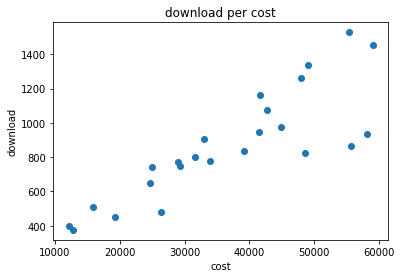

In [3]:
import numpy as np
import matplotlib.pyplot as plt

train_xy = np.loadtxt("csv/download_cost.csv", delimiter=',', skiprows=1)
train_x = train_xy[:,0]
train_y = train_xy[:,1]

plt.plot(train_x, train_y, 'o')
plt.title("download per cost")
plt.xlabel("cost")
plt.ylabel("download")
plt.show()

In [4]:
theta0=np.random.rand()
theta1=np.random.rand()

def f(x):
    return theta0 + theta1 * x

def E(x,y):
    return 0.5 * np.sum((y-f(x)) ** 2)

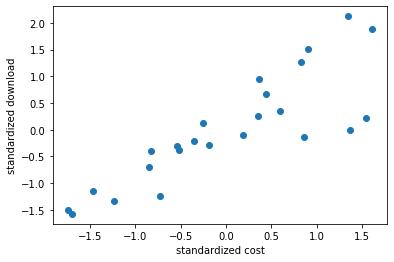

In [5]:
mu_x = train_x.mean()
sigma_x = train_x.std()

mu_y = train_y.mean()
sigma_y = train_y.std()

def standardize(a,mu,sigma):
    return (a - mu) / sigma

standardized_x = standardize(train_x,  mu_x, sigma_x)
standardized_y = standardize(train_y, mu_y, sigma_y)

plt.plot(standardized_x , standardized_y , 'o')
plt.xlabel("standardized cost")
plt.ylabel("standardized download")
plt.show()

In [6]:
ETA = 0.001 #学習率
diff = 1 #diffの初期値
count=0 #更新回数

## 損失関数の値
error = E(standardized_x , standardized_y)

## theta0,theta1の良い値が見つかるまで更新を繰り返す
while abs(diff)>0.0001:
    #theta0,theta1の更新式
    new_theta0 = theta0 - ETA*np.sum((f(standardized_x)-standardized_y))
    new_theta1 = theta1 - ETA*np.sum((f(standardized_x)-standardized_y) * standardized_x)

    #パラメータを更新する
    theta0 = new_theta0
    theta1 = new_theta1

    #新しい損失関数の値
    current_error = E(standardized_x, standardized_y)
    #（前回の更新時の損失関数の値）ー（今回の更新時の損失関数）
    diff = error - current_error
    #損失関数の更新
    error = current_error

    #回数の更新
    count+=1

    #出力
    print(str(count) + "回目のtheta0: " + str(theta0) + ", theta1: " + str(theta1) + ", diff: " + str(diff))

1回目のtheta0: 0.9149819717744788, theta1: 0.4299640992311756, diff: 0.6037721329767045
2回目のtheta0: 0.8930224044518913, theta1: 0.4399591849422422, diff: 0.5751388433424172
3回目のtheta0: 0.8715898667450459, theta1: 0.44971438859624313, diff: 0.5478634588357476
4回目のtheta0: 0.8506717099431648, theta1: 0.45923546736254806, diff: 0.5218815821639211
5回目のtheta0: 0.8302555889045288, theta1: 0.4685280402384617, diff: 0.4971318700113798
6回目のtheta0: 0.8103294547708201, theta1: 0.4775975913653534, diff: 0.473555888207958
7回目のtheta0: 0.7908815478563204, theta1: 0.4864494732651997, diff: 0.45109797376558447
8回目のtheta0: 0.7719003907077687, theta1: 0.4950889099994497, diff: 0.42970510345772617
9回目のtheta0: 0.7533747813307823, theta1: 0.5035210002520777, diff: 0.4093267686313471
10回目のtheta0: 0.7352937865788435, theta1: 0.5117507203386426, diff: 0.389914855955773
11回目のtheta0: 0.7176467357009513, theta1: 0.5197829271431299, diff: 0.37142353382692583
12回目のtheta0: 0.7004232140441284, theta1: 0.5276223609843096,

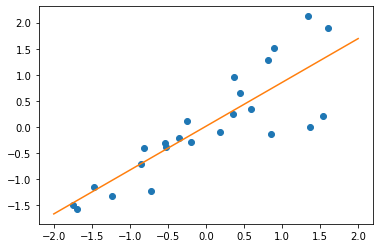

In [7]:
x = np.linspace(-2,2,100)

plt.plot(standardized_x , standardized_y, 'o')
plt.plot(x, f(x))
plt.show()